# Credit EDA Case Study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Preparation

In [2]:
# dataframe with all columns 
application_df = pd.read_csv(r"C:\Users\Divija\Downloads\application_data.csv",na_values=['XNA','XNP'])

# percentage of missing data in columns
application_df.isnull().mean()*100.00  

# dataframe with columns with more than 50% missing data dropped
application_df = application_df.loc[:,application_df.isnull().mean() < 0.50] 

# dataframe with only target as 1 with all columns except missing data more than 50%
application_df_default = application_df[application_df['TARGET']==1] 

application_df_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding Data Imbalance

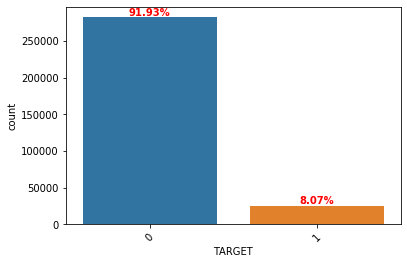

In [3]:
#
ax=sns.countplot(x=application_df['TARGET'],data= application_df)
ax.set_facecolor("white")
plt.xticks(rotation=45)
    
for p in ax.patches:
   x=p.get_bbox().get_points()[:,0]
   y=p.get_bbox().get_points()[1,1]

   ax.annotate('{:.2f}%'.format(100.*y/len(application_df)), (x.mean(), y), 
            ha='center', va='bottom',color='red',weight='bold') 

The data imbalance ratio is 11:1

In [4]:
# dataframe with only target as 0 with all columns except missing data more than 50%
application_df_other = application_df[application_df['TARGET']==0]
application_df_other.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


## Univariate analysis for the selected categorical columns for Target = 1 (Clients with payment difficulties)


In [5]:
## univariate analysis for only TARGET = 1 
##dropping unwanted columns

application_df_default= application_df_default[['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
                                                'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE',
                                               'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','DAYS_BIRTH','CNT_FAM_MEMBERS','OCCUPATION_TYPE','ORGANIZATION_TYPE',
                                              'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                                             'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]
application_df_default.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 23 columns):
SK_ID_CURR                    24825 non-null int64
TARGET                        24825 non-null int64
CODE_GENDER                   24825 non-null object
FLAG_OWN_CAR                  24825 non-null object
FLAG_OWN_REALTY               24825 non-null object
CNT_CHILDREN                  24825 non-null int64
AMT_INCOME_TOTAL              24825 non-null float64
AMT_CREDIT                    24825 non-null float64
AMT_ANNUITY                   24825 non-null float64
AMT_GOODS_PRICE               24804 non-null float64
NAME_INCOME_TYPE              24825 non-null object
NAME_EDUCATION_TYPE           24825 non-null object
NAME_FAMILY_STATUS            24825 non-null object
DAYS_BIRTH                    24825 non-null int64
CNT_FAM_MEMBERS               24825 non-null float64
OCCUPATION_TYPE               18547 non-null object
ORGANIZATION_TYPE             21835 non-null object
DEF_3

In [6]:
# Dealing with mising data in OCCUPATION_TYPE and ORGANISATION_TYPE.

application_df_default['OCCUPATION_TYPE'] = application_df_default['OCCUPATION_TYPE'].replace(np.nan, 0)
application_df_default['ORGANIZATION_TYPE'] = application_df_default['ORGANIZATION_TYPE'].replace(np.nan, 0)
application_df_default.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                 21
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
DAYS_BIRTH                       0
CNT_FAM_MEMBERS                  0
OCCUPATION_TYPE                  0
ORGANIZATION_TYPE                0
DEF_30_CNT_SOCIAL_CIRCLE        36
OBS_60_CNT_SOCIAL_CIRCLE        36
DAYS_LAST_PHONE_CHANGE           0
AMT_REQ_CREDIT_BUREAU_YEAR    4292
AMT_REQ_CREDIT_BUREAU_MON     4292
AMT_REQ_CREDIT_BUREAU_QRT     4292
dtype: int64

In [7]:
#Selecting some important columns for categorical univariate analysis

categorical = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']

for a in categorical:
    application_df_default[a] = application_df_default[a].astype('category')
    
application_df_default.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-9461,1.0,Laborers,Business Entity Type 3,2.0,2.0,-1134.0,1.0,0.0,0.0
26,100031,1,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,-18724,1.0,Cooking staff,Business Entity Type 3,1.0,10.0,-161.0,2.0,0.0,2.0
40,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,-17482,2.0,Laborers,Business Entity Type 3,0.0,0.0,-1075.0,4.0,2.0,0.0
42,100049,1,F,N,N,0,135000.0,288873.0,16258.5,238500.0,...,-13384,2.0,Sales staff,Self-employed,0.0,1.0,-1480.0,2.0,0.0,0.0
81,100096,1,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,-24794,2.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
def uni_analysis(colname,m=6,n=6):
    plt.figure(num=None,figsize=(m,n),dpi=100,facecolor='w',edgecolor='k')
    ax=sns.countplot(colname,data= application_df_default, order = application_df_default[colname].value_counts().index)
    ax.set_facecolor("white")
    plt.title(f'Distribution of {colname} data in current application data for loan defaulters')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]

        ax.annotate('{:.2f}%'.format(100.*y/len(application_df_default)), (x.mean(), y), 
            ha='center', va='bottom',color='red',weight='bold') # set the align

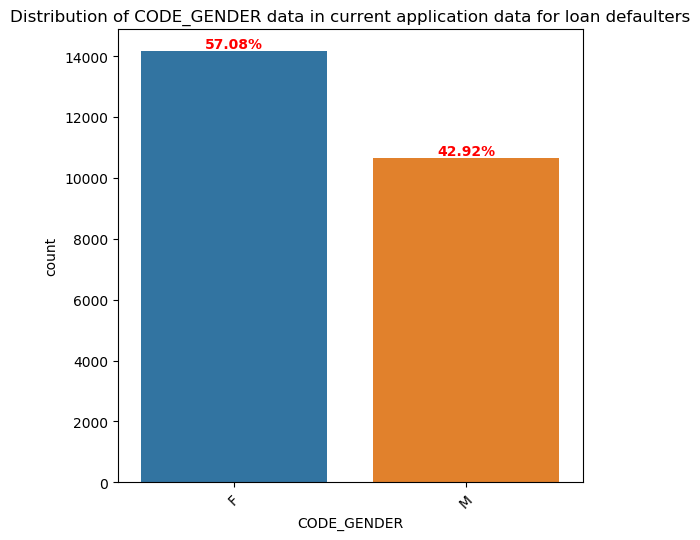

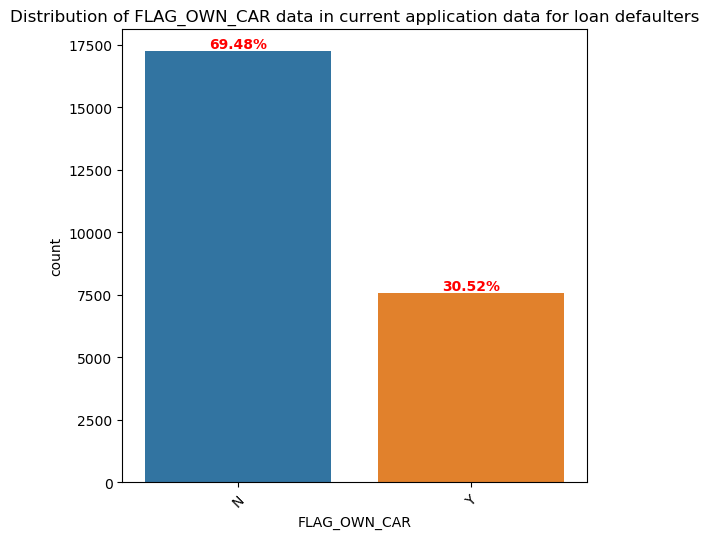

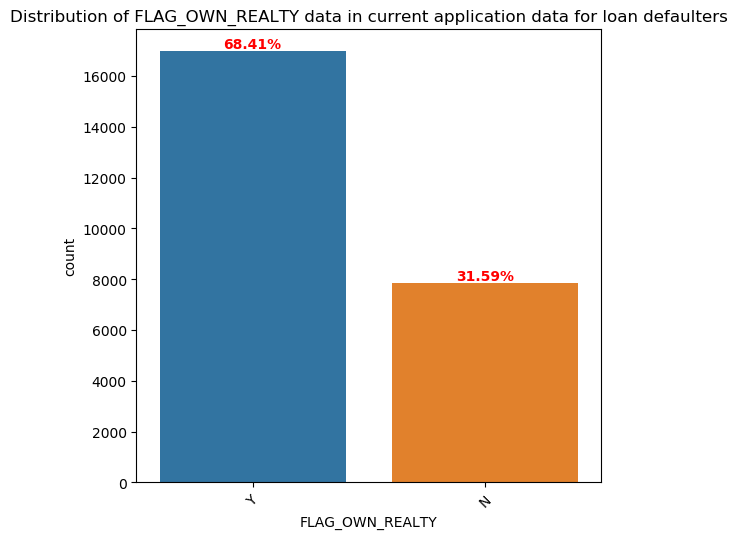

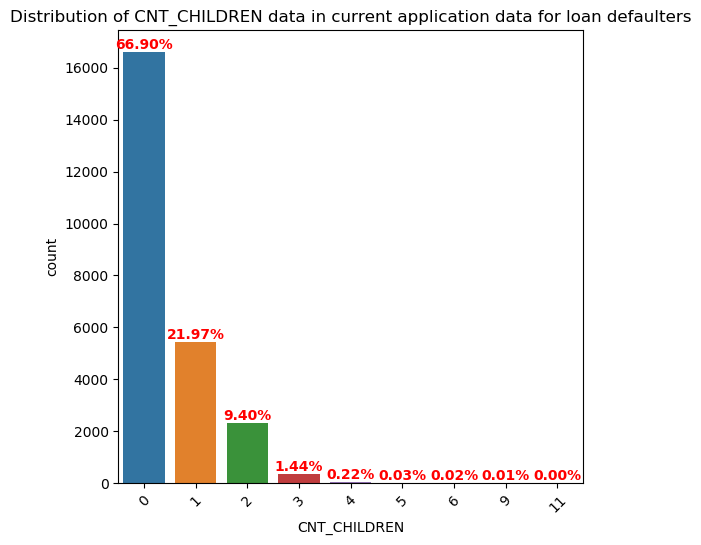

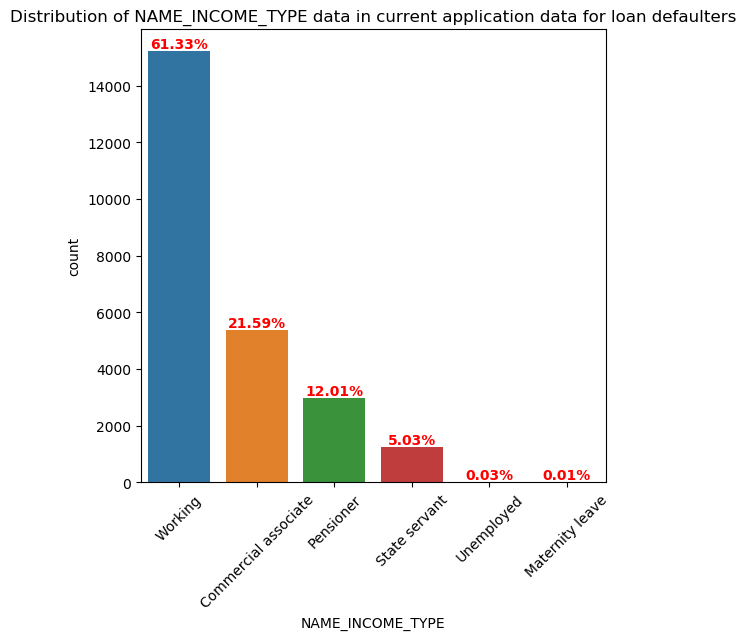

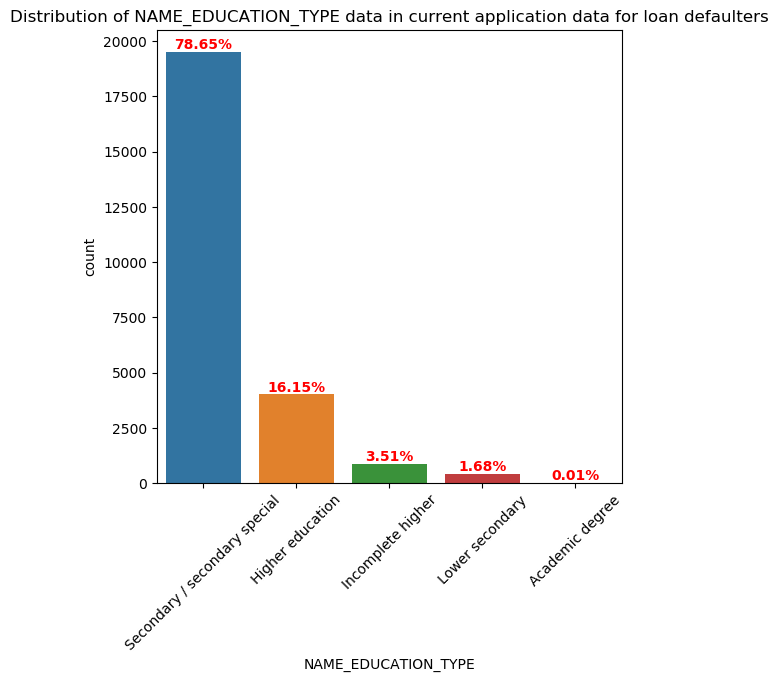

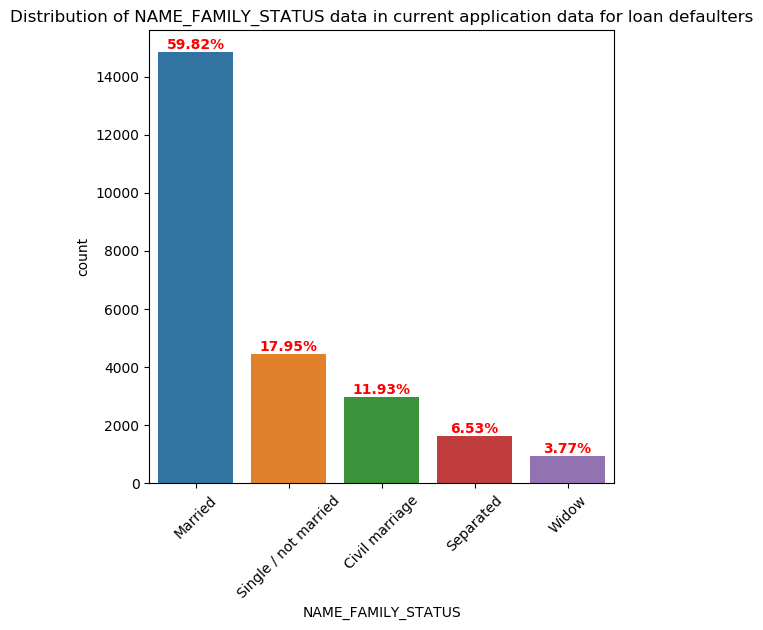

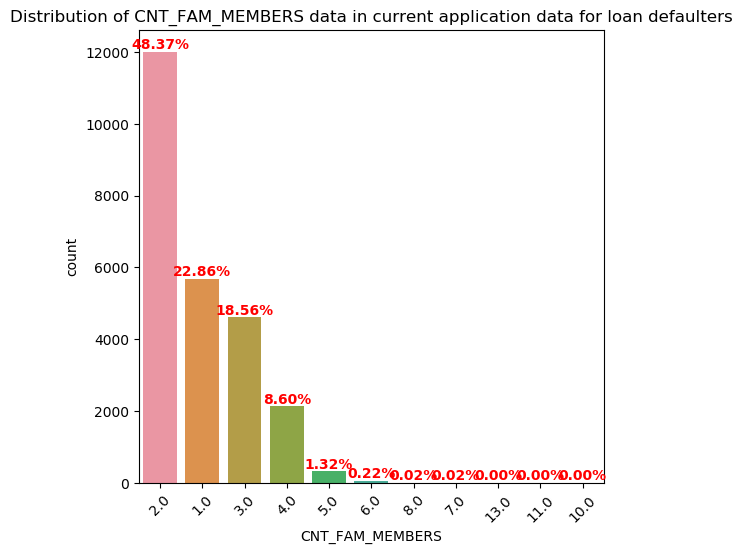

In [9]:
for a in categorical:
    
    uni_analysis(a)


#### Inferences from the univariate analysis of categorical columns
Below are the inferences from the univariate analysis performed on categorical columns for the clients with payment difficulties
    1. Percentage of female clients is more when compare to male clients who are with payment difficulties (Female - ~57% and Male ~43%)
    2. Clients who are not having car are having more payment difficulties when compared to the other.
    3. Clients with own house are having more payment difficulties when compared to the other segment.
    4. Clients with no children are more likely to have the payment difficulties when compared to others.
    5. Working class clients are more likely to have the payment difficulties when compare to the other class of employement.
    6. Clients who are educated till secondary/secondary special are more when compared to others who has payment difficulties.
    7. Married clients are more likely to have the payment difficulties
    8. Clients with a family size of 2 are having more chances of having payment difficulties.

## Univariate analysis for the selected categorical columns for Target = 0 (other cases)


In [10]:
application_df_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      282686 non-null int64
TARGET                          282686 non-null int64
NAME_CONTRACT_TYPE              282686 non-null object
CODE_GENDER                     282682 non-null object
FLAG_OWN_CAR                    282686 non-null object
FLAG_OWN_REALTY                 282686 non-null object
CNT_CHILDREN                    282686 non-null int64
AMT_INCOME_TOTAL                282686 non-null float64
AMT_CREDIT                      282686 non-null float64
AMT_ANNUITY                     282674 non-null float64
AMT_GOODS_PRICE                 282429 non-null float64
NAME_TYPE_SUITE                 281464 non-null object
NAME_INCOME_TYPE                282686 non-null object
NAME_EDUCATION_TYPE             282686 non-null object
NAME_FAMILY_STATUS              282686 non-null object
NAME_HOUSING_TYPE               282686 non-null object
REGION_P

In [11]:
application_df_other= application_df_other[['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
                                                'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE',
                                               'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','DAYS_BIRTH','CNT_FAM_MEMBERS','OCCUPATION_TYPE','ORGANIZATION_TYPE',
                                              'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                                              'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]
application_df_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 24 columns):
SK_ID_CURR                    282686 non-null int64
TARGET                        282686 non-null int64
CODE_GENDER                   282682 non-null object
FLAG_OWN_CAR                  282686 non-null object
FLAG_OWN_REALTY               282686 non-null object
CNT_CHILDREN                  282686 non-null int64
AMT_INCOME_TOTAL              282686 non-null float64
AMT_CREDIT                    282686 non-null float64
AMT_ANNUITY                   282674 non-null float64
AMT_GOODS_PRICE               282429 non-null float64
NAME_INCOME_TYPE              282686 non-null object
NAME_EDUCATION_TYPE           282686 non-null object
NAME_FAMILY_STATUS            282686 non-null object
DAYS_BIRTH                    282686 non-null int64
CNT_FAM_MEMBERS               282684 non-null float64
OCCUPATION_TYPE               192573 non-null object
ORGANIZATION_TYPE             230302 non

In [12]:
# Dealing with mising data in OCCUPATION_TYPE and ORGANISATION_TYPE.

application_df_other['OCCUPATION_TYPE'] = application_df_other['OCCUPATION_TYPE'].replace(np.nan, 0)
application_df_other['ORGANIZATION_TYPE'] = application_df_other['ORGANIZATION_TYPE'].replace(np.nan, 0)
application_df_other.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       4
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 257
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
CNT_FAM_MEMBERS                   2
OCCUPATION_TYPE                   0
ORGANIZATION_TYPE                 0
DEF_30_CNT_SOCIAL_CIRCLE        985
OBS_60_CNT_SOCIAL_CIRCLE        985
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_QRT     37227
AMT_REQ_CREDIT_BUREAU_YEAR    37227
AMT_REQ_CREDIT_BUREAU_MON     37227
AMT_REQ_CREDIT_BUREAU_QRT     37227
dtype: int64

In [13]:
categorical_other = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']

for b in categorical_other:
    application_df_other[b] = application_df_other[b].astype('category')
    
application_df_other.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,2.0,Core staff,School,0.0,1.0,-828.0,0.0,0.0,0.0,0.0
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,1.0,Laborers,Government,0.0,0.0,-815.0,0.0,0.0,0.0,0.0
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,Laborers,Business Entity Type 3,0.0,2.0,-617.0,NaN,NaN,NaN,NaN
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,1.0,Core staff,Religion,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,2.0,Laborers,Other,0.0,0.0,-2536.0,1.0,1.0,0.0,1.0


In [14]:
def uni_analysis_other(colname,m=6,n=6):
    plt.figure(num=None,figsize=(m,n),dpi=100,facecolor='w',edgecolor='k')
    ax=sns.countplot(colname,data= application_df_other, order = application_df_other[colname].value_counts().index)
    ax.set_facecolor("black")
    plt.title(f'Distribution of {colname} data in current application data for Target = 0')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]

        ax.annotate('{:.2f}%'.format(100.*y/len(application_df_other)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') 

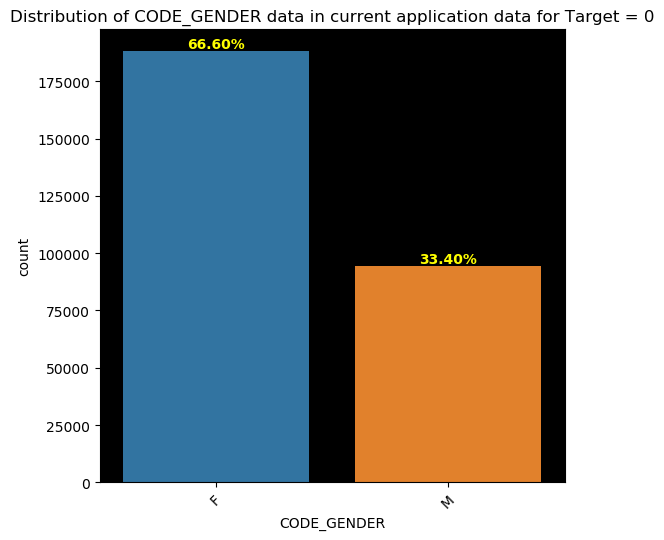

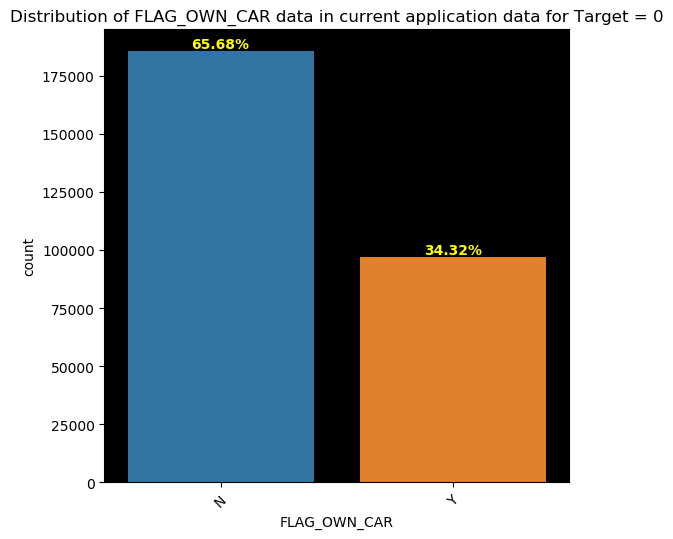

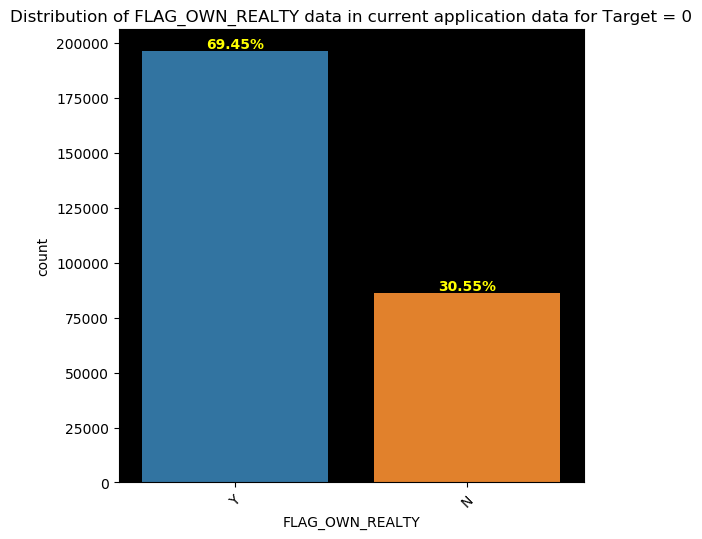

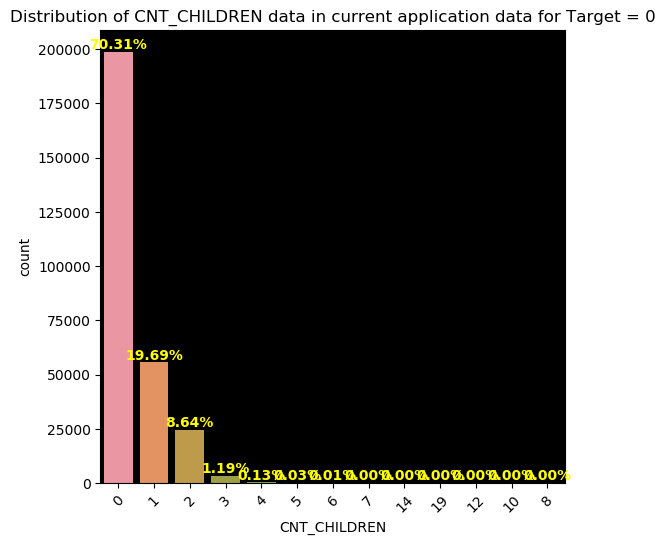

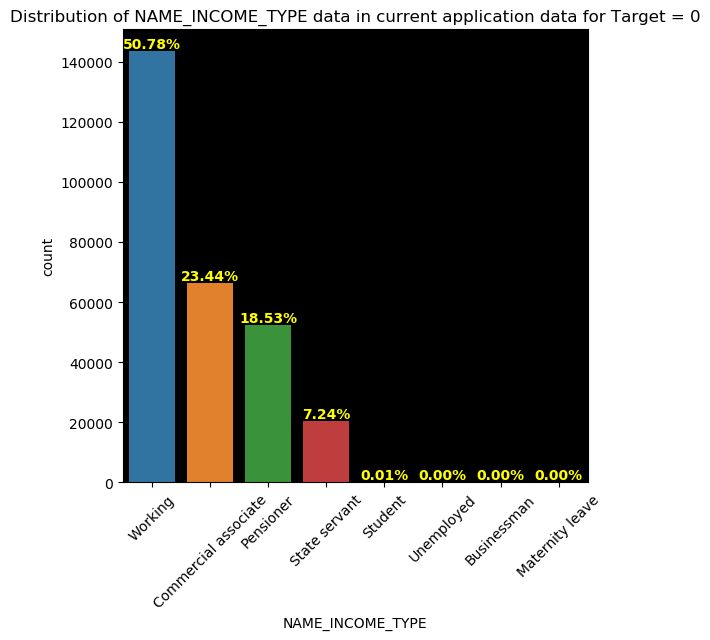

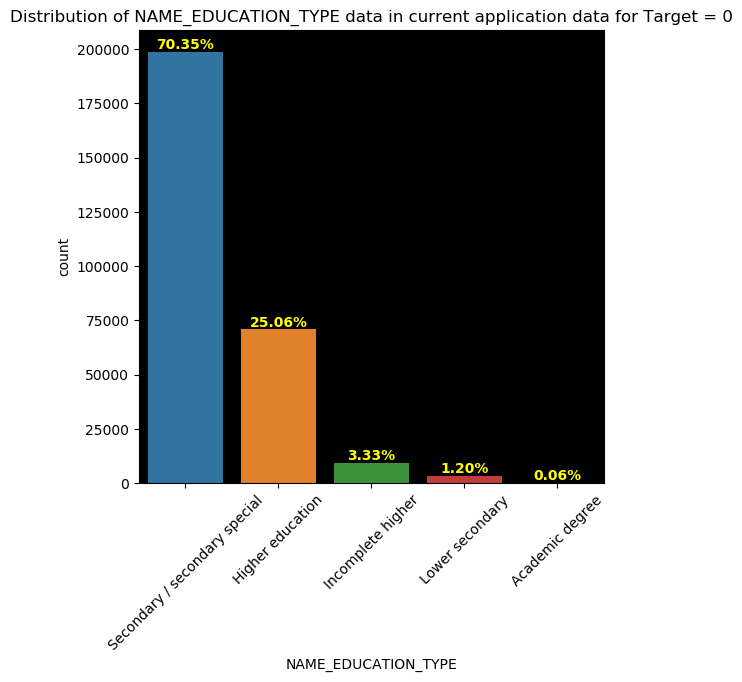

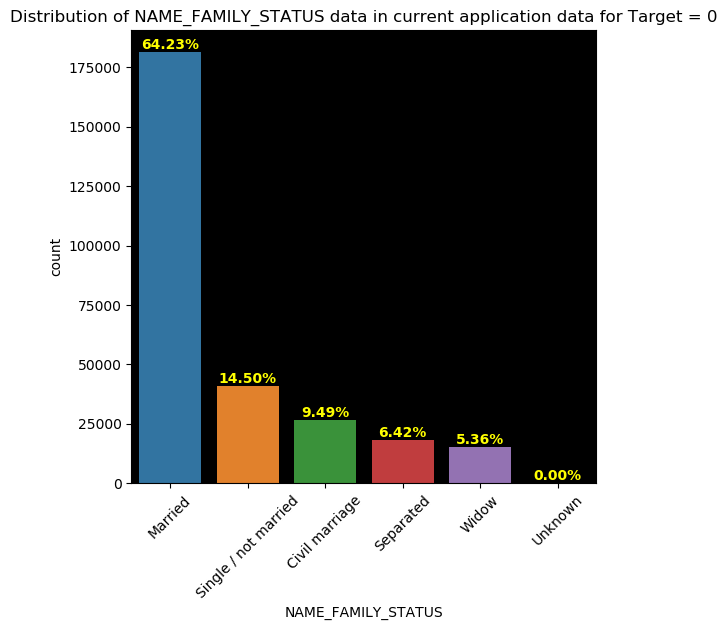

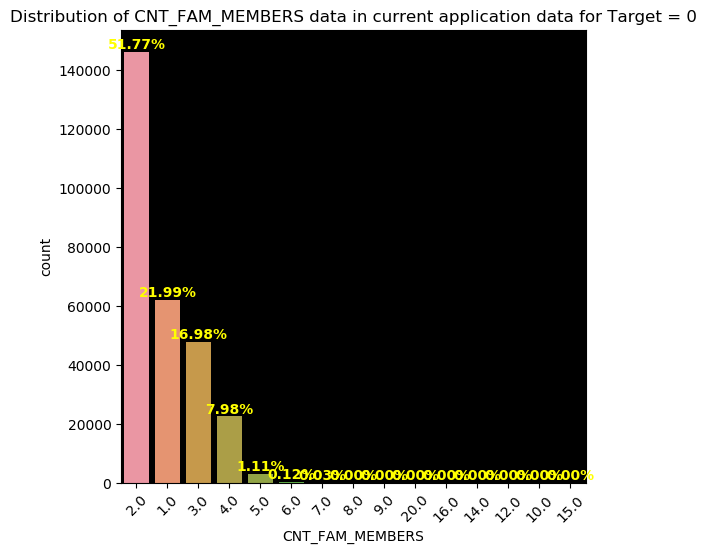

In [15]:
for b in categorical_other:
    
    uni_analysis_other(b)

#### The following are  the inferences from the univariate analysis for the selected columns,
Below are the inferences from the univariate analysis 
    1. Among the males and females, percentage of females is more when compared to the males who are not having any payment difficulties.
    2. Clients  with no own car are more in the segment of clients not having payment difficulties 
    3. Clients with own house are  more.
    4. clients with no children are more when compared to others who have no payment difficulties
    5. Working class clients are more in this segment with no payment difficulties
    6. CLients with secondary education are more
    7. Married clients are high  in number with no payment difficulties
    8. It is observed that the clients with a family size of 2 are less liely to have payment difficulties


In [16]:
def seg_analysis(colname,m=14,n=8):
    df= round(100 * application_df[[colname,'TARGET']].groupby(colname).sum()/application_df[[colname,'TARGET']].groupby(colname).count(),2)
    df.rename(columns={'TARGET':'defaulters'},inplace=True)
    df['non-defaulters'] = 100 - df['defaulters']
    df = df.sort_values('defaulters',ascending=False)
    
    
    plt.figure(num=None,figsize=(m,n),dpi=100,facecolor='w',edgecolor='k')
    
    i=1
    
    for e in ['defaulters', 'non-defaulters']:
        plt.subplot(1,2,i)
        ax = sns.barplot(x=df.index, y=e, data=df)
        ax.set_facecolor("white")
        plt.title(f' {e} with respect to {colname}')
        plt.xticks(rotation=45)
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate(y, (x.mean(), y), 
            ha='center', va='bottom',color='red',weight='bold')
        
        i +=1

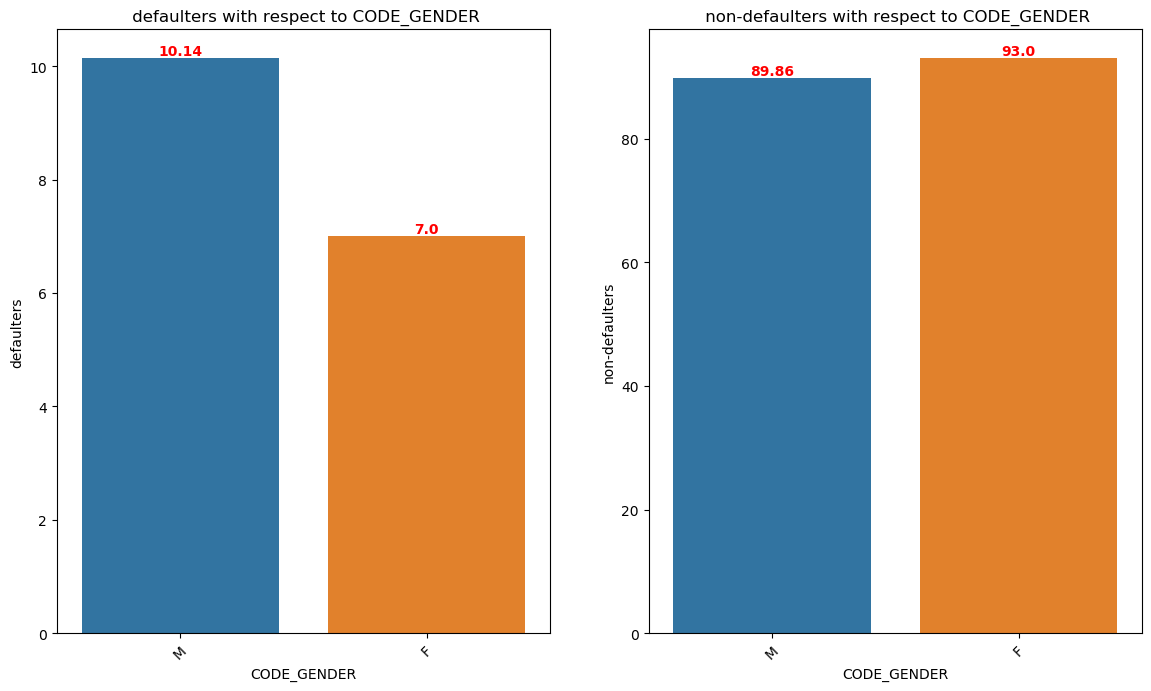

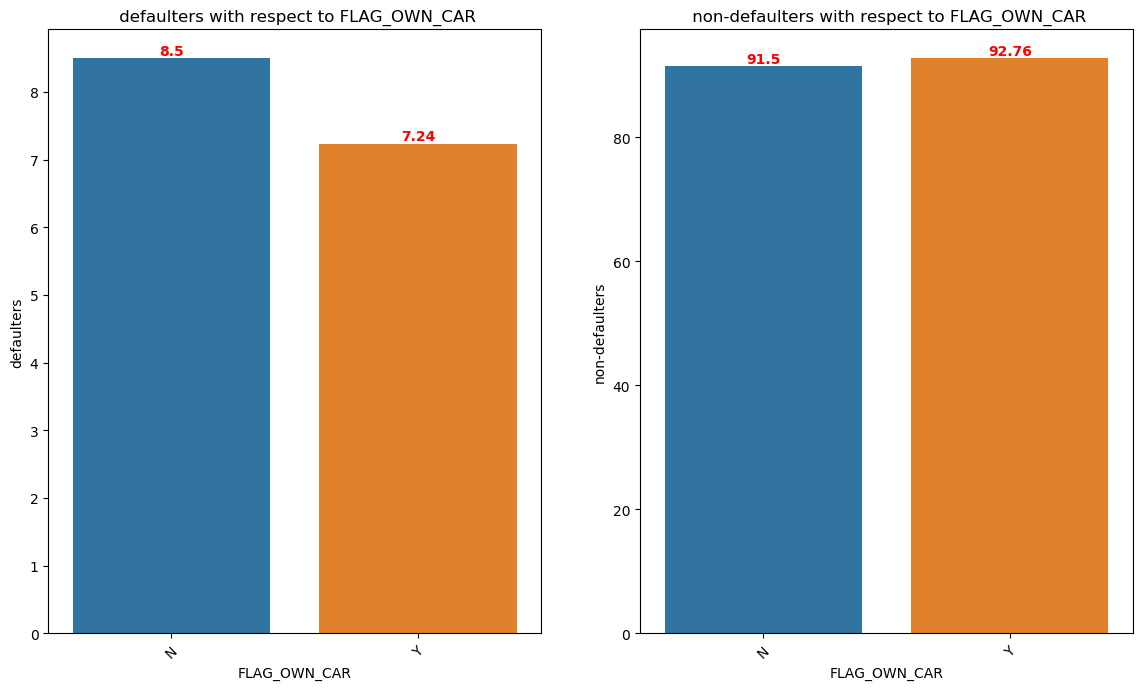

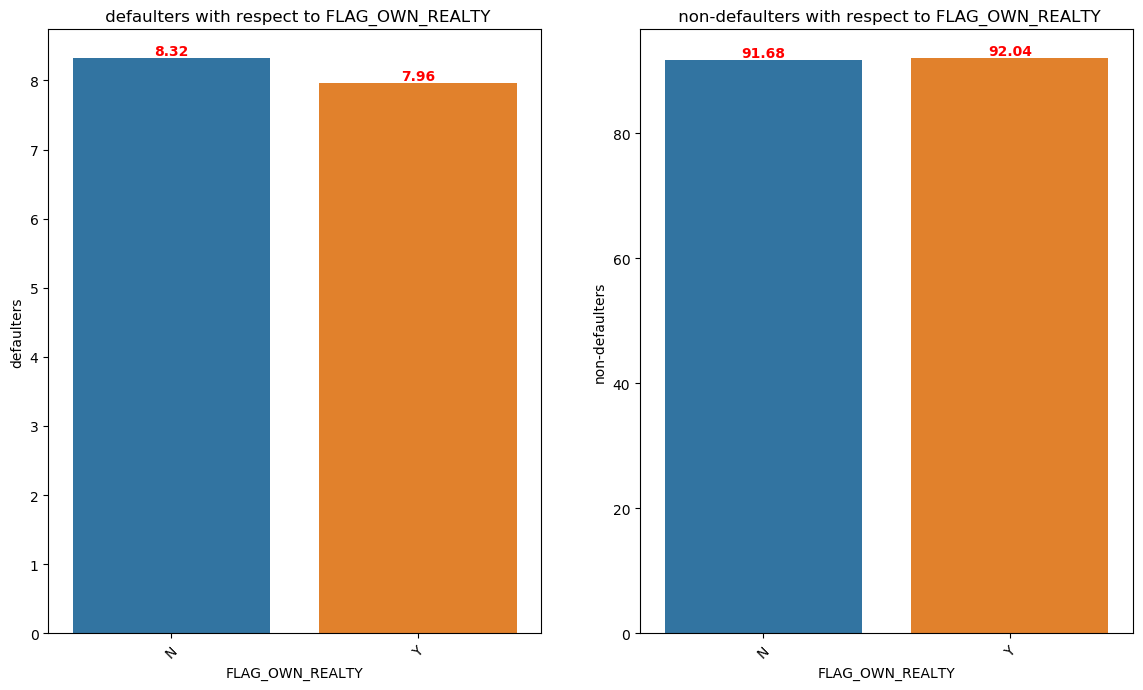

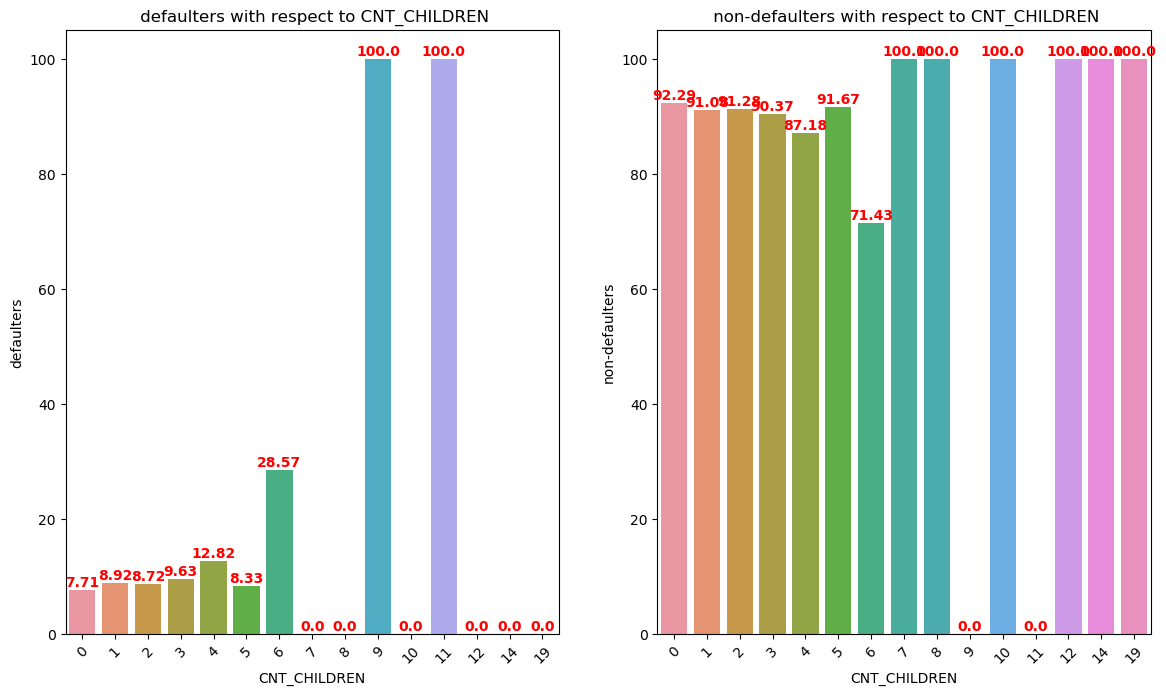

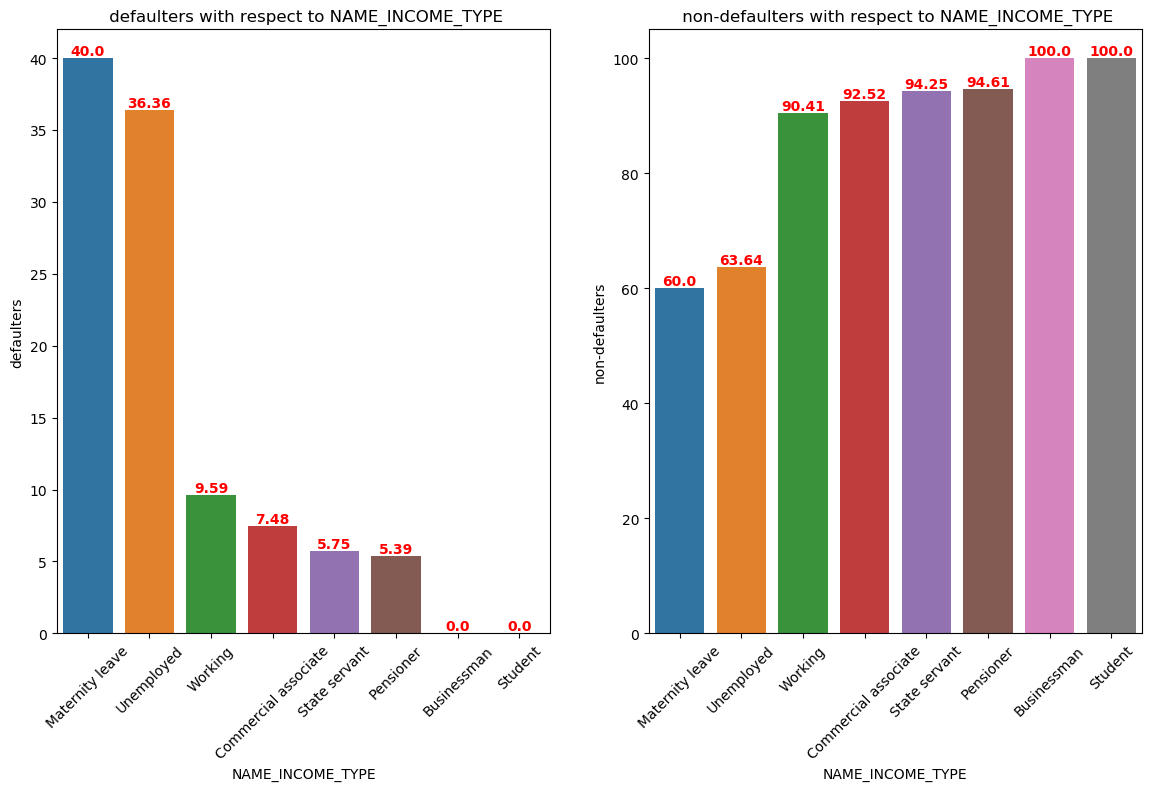

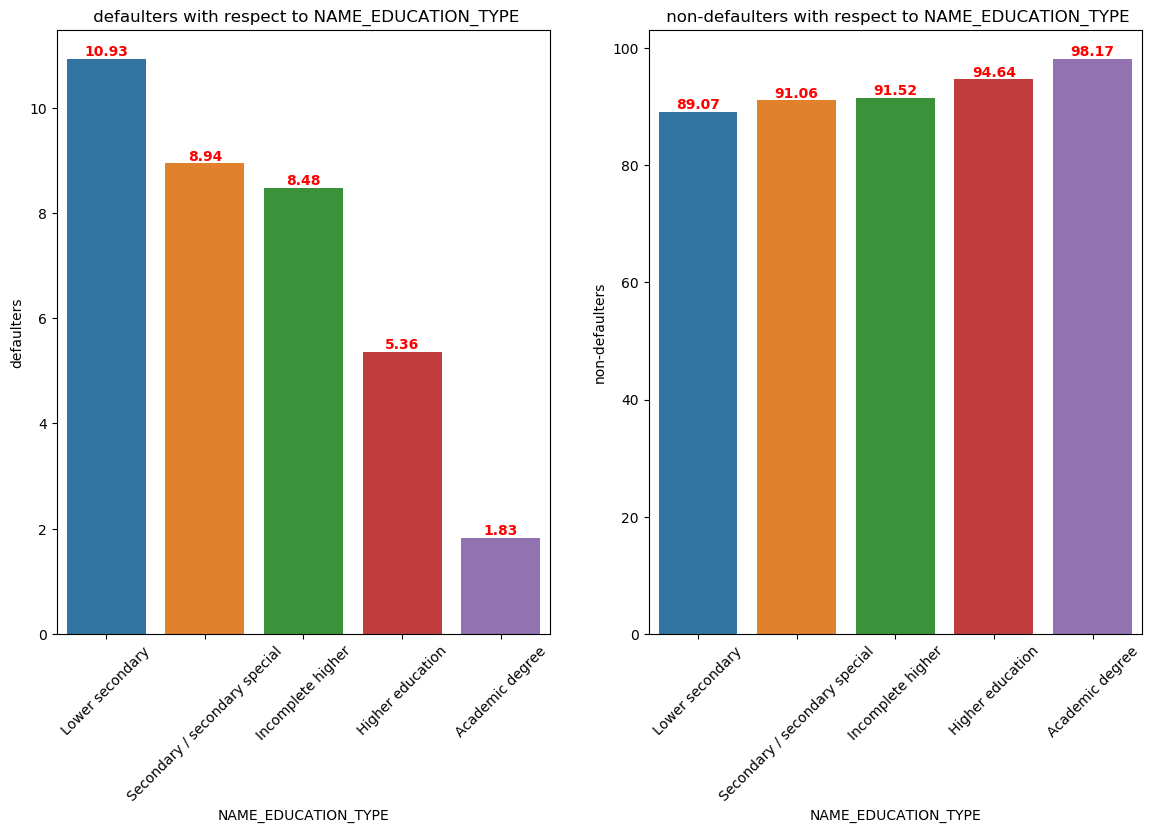

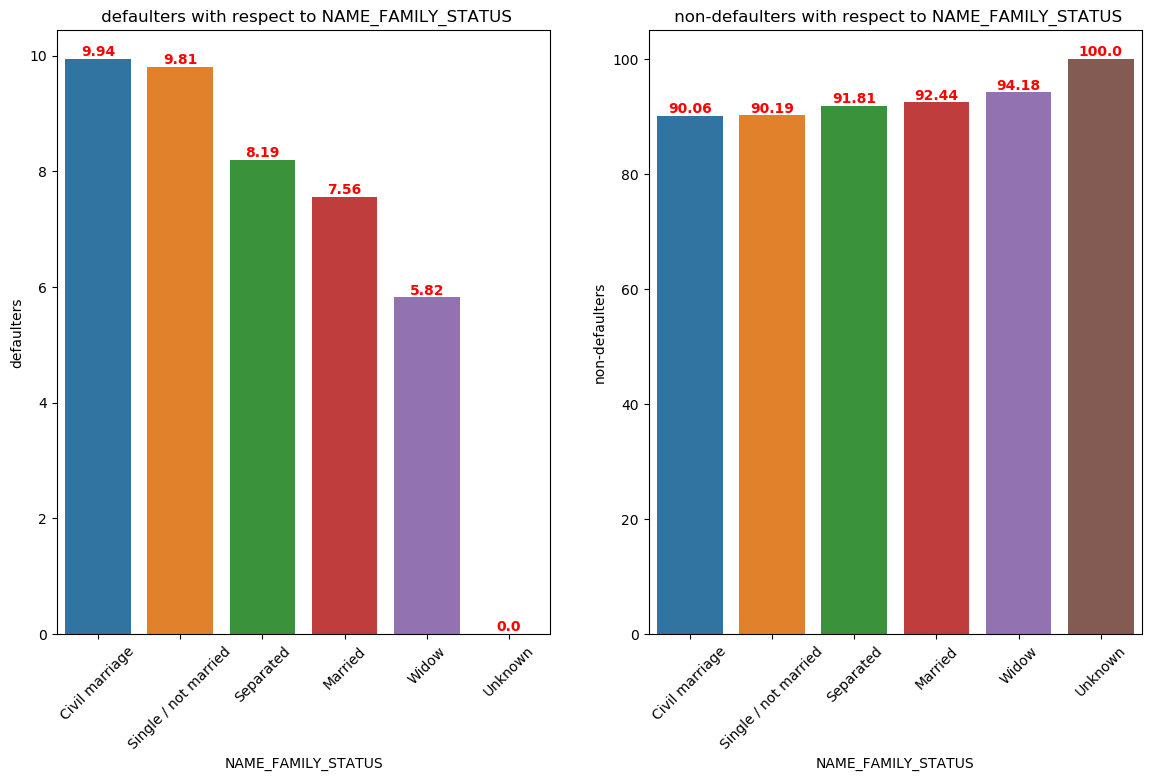

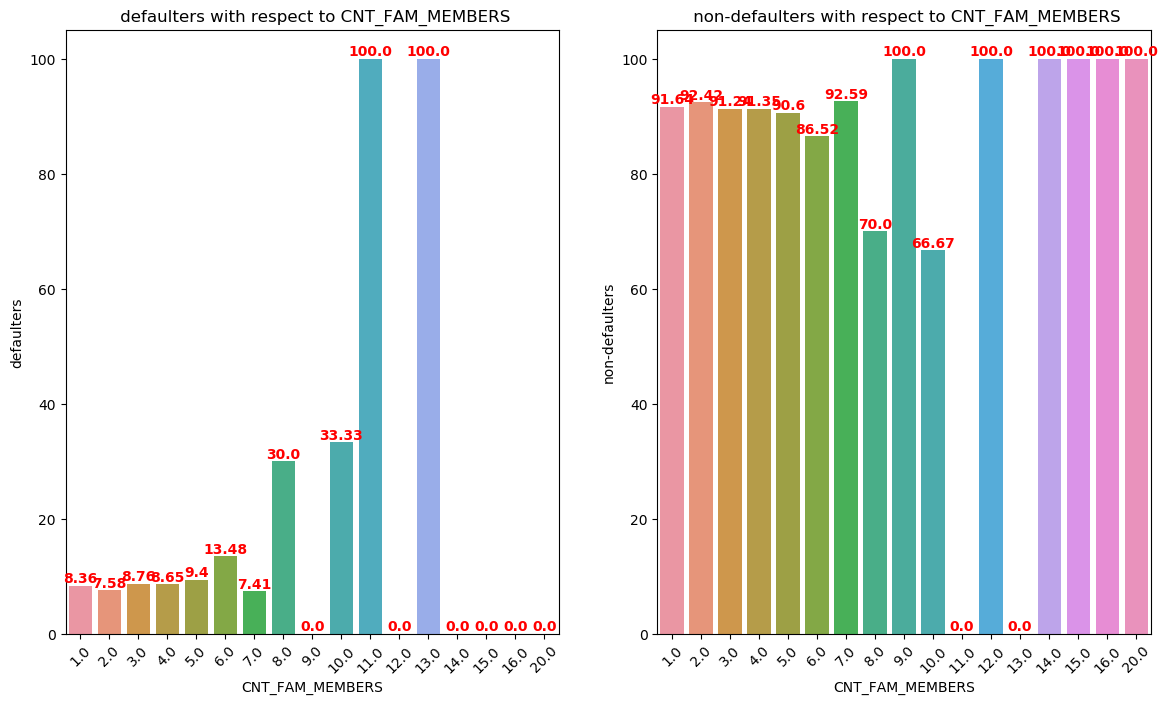

In [17]:
for e in categorical:
    seg_analysis(e)

#### Inferences from the application data,
Below are the inferences from application data:

    1.Male defaulters are more when compared to females. Almost 3% difference is observed in male vs female defaulters.
    2.Clients with no own car are having more changes of being default as the data is showing that this percentage is almost   ~8.5. 
    3.per the observation, we can see that  the people with no own house are having more changes of being loan defaulters.
    4.Clients with no children are less likely to default the loan.
    5.Clients in maternity leave are having very high chances of being defaulters. Thismay be due to the additional expenses incurred due to the birth and mostly there won't be any salary for the clients who are in maternity leave if they extend their leave.
    6.Clients with lower secandary education are more in defaulters. Banks should consider this aspect before  approving the loan.
    7.Clients with Civil marriages and marital status as single are more likely to default the loan. 
    8.Need more data to perform the in depth analysis for identifying the impact of family size on defaulting the loan.

## Numerical Data Analysis

In [18]:
#Replacing 0 for NaN
application_df_default['AMT_INCOME_TOTAL'] = application_df_default['AMT_INCOME_TOTAL'].replace(np.nan, 0)
application_df_default['AMT_CREDIT'] = application_df_default['AMT_CREDIT'].replace(np.nan, 0)
application_df_default['AMT_GOODS_PRICE'] = application_df_default['AMT_GOODS_PRICE'].replace(np.nan, 0)
application_df_default['DEF_30_CNT_SOCIAL_CIRCLE'] = application_df_default['DEF_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
application_df_default['OBS_60_CNT_SOCIAL_CIRCLE'] = application_df_default['OBS_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
application_df_default['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_df_default['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan, 0)
application_df_default['AMT_REQ_CREDIT_BUREAU_MON'] = application_df_default['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan, 0)
application_df_default['AMT_REQ_CREDIT_BUREAU_QRT'] = application_df_default['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan, 0)
application_df_default.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [19]:
#Creating a df for numerical columns
numerical = application_df_default.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]
numerical

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,202500.0,406597.5,24700.5,351000.0,1.0,0.0,0.0
26,112500.0,979992.0,27076.5,702000.0,2.0,0.0,2.0
40,202500.0,1193580.0,35028.0,855000.0,4.0,2.0,0.0
42,135000.0,288873.0,16258.5,238500.0,2.0,0.0,0.0
81,81000.0,252000.0,14593.5,252000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
307448,207000.0,450000.0,32746.5,450000.0,2.0,0.0,0.0
307475,144000.0,1303200.0,46809.0,1125000.0,6.0,1.0,0.0
307481,225000.0,297000.0,19975.5,297000.0,3.0,0.0,0.0
307489,225000.0,521280.0,23089.5,450000.0,2.0,0.0,1.0


In [20]:
#converting days into years
application_df_default['DAYS_BIRTH'] = application_df_default['DAYS_BIRTH']/(-365)
application_df_default['DAYS_BIRTH'].round()

0         26.0
26        51.0
40        48.0
42        37.0
81        68.0
          ... 
307448    27.0
307475    37.0
307481    57.0
307489    45.0
307509    33.0
Name: DAYS_BIRTH, Length: 24825, dtype: float64

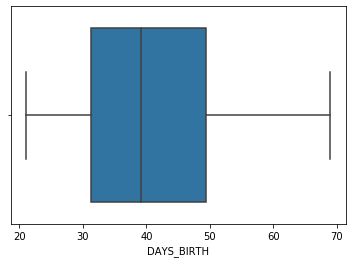

In [21]:
sns.boxplot(x=application_df_default['DAYS_BIRTH'])

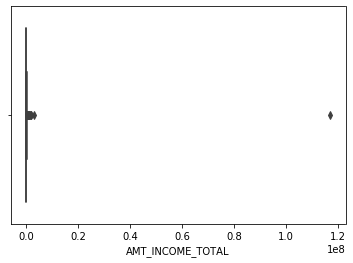

In [22]:
sns.boxplot(x=application_df_default['AMT_INCOME_TOTAL'])

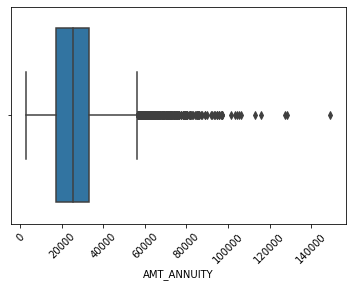

In [23]:
ax=sns.boxplot(x=application_df_default['AMT_ANNUITY'])
ax.set_facecolor("white")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(application_df_other)), (x.mean(), y), 
 ha='center', va='bottom',color='yellow',weight='bold') # set the align

## Detecting and removing outliers

In [24]:
sorted(application_df_default['AMT_INCOME_TOTAL'])
q1, q3= np.percentile(application_df_default['AMT_INCOME_TOTAL'],[25,75])
iqr = q3 - q1
lower_bound_AMT_INCOME_TOTAL = q1 -(1.5 * iqr) 
upper_bound_AMT_INCOME_TOTAL = q3 +(1.5 * iqr)
application_df_default = application_df_default[application_df_default['AMT_INCOME_TOTAL'] > lower_bound_AMT_INCOME_TOTAL] 
application_df_default = application_df_default[application_df_default['AMT_INCOME_TOTAL'] < upper_bound_AMT_INCOME_TOTAL] 


In [25]:
sorted(application_df_default['AMT_CREDIT'])
q1, q3= np.percentile(application_df_default['AMT_CREDIT'],[25,75])
iqr = q3 - q1
lower_bound_AMT_CREDIT = q1 -(1.5 * iqr) 
upper_bound_AMT_CREDIT = q3 +(1.5 * iqr)
application_df_default = application_df_default[application_df_default['AMT_CREDIT'] > lower_bound_AMT_CREDIT] 
application_df_default = application_df_default[application_df_default['AMT_CREDIT'] < upper_bound_AMT_CREDIT] 


In [26]:
sorted(application_df_default['AMT_ANNUITY'])
q1, q3= np.percentile(application_df_default['AMT_ANNUITY'],[25,75])
iqr = q3 - q1
lower_bound_AMT_ANNUITY = q1 -(1.5 * iqr) 
upper_bound_AMT_ANNUITY = q3 +(1.5 * iqr)
application_df_default = application_df_default[application_df_default['AMT_ANNUITY'] > lower_bound_AMT_ANNUITY] 
application_df_default = application_df_default[application_df_default['AMT_ANNUITY'] < upper_bound_AMT_ANNUITY] 


## Plotting histogram for Numerical Columns for Target = 1

In [27]:
amount_df = application_df_default[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]

In [28]:
def hist_numerical(col_name,m=5,n=5):
    plt.figure(num=None,figsize=(m,n),dpi=100,facecolor='w',edgecolor='k')
    
    ax=sns.distplot(amount_df[col_name],bins=10, kde=False)
    for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]

            ax.annotate('{:.2f}%'.format(100.*y/len(application_df_default)), (x.mean(), y), 
                ha='center', va='bottom',color='blue',weight='bold')

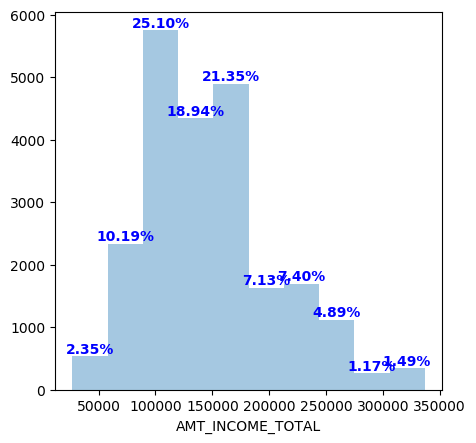

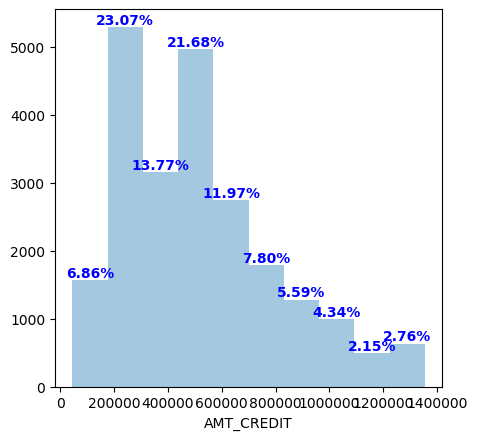

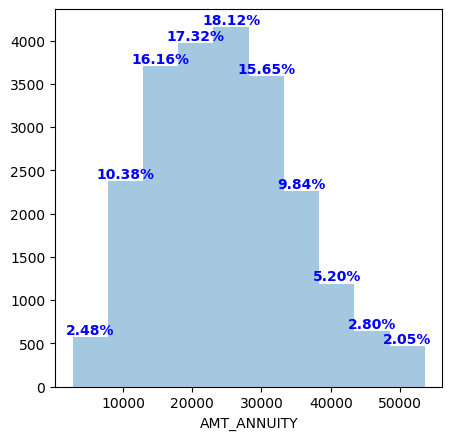

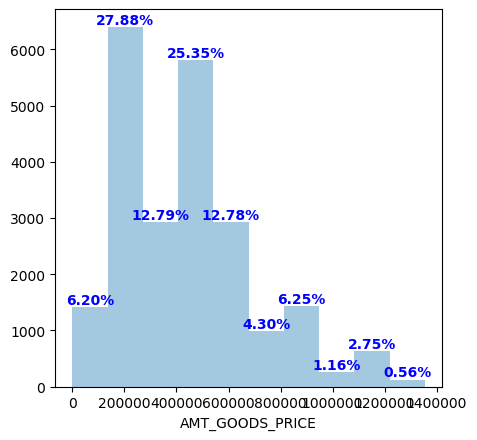

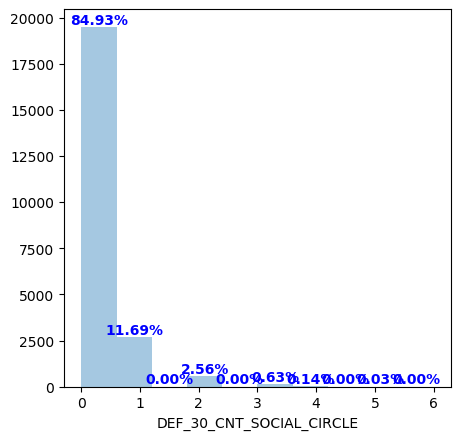

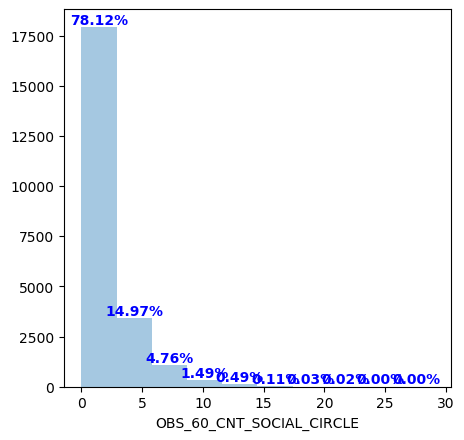

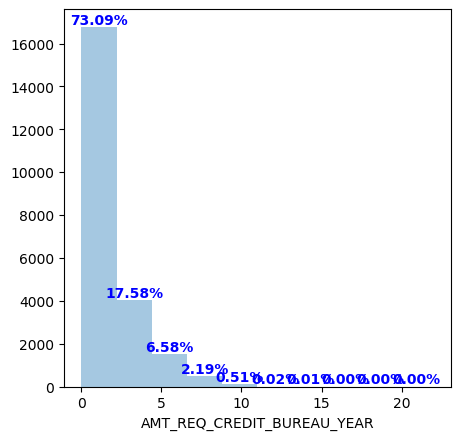

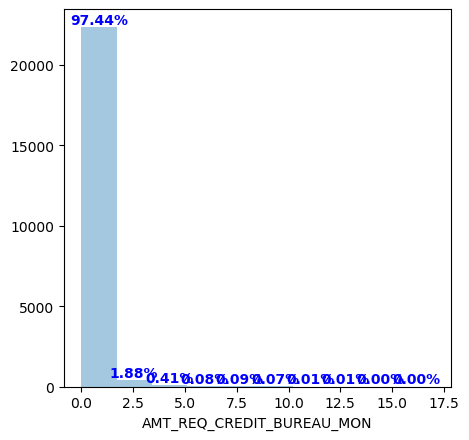

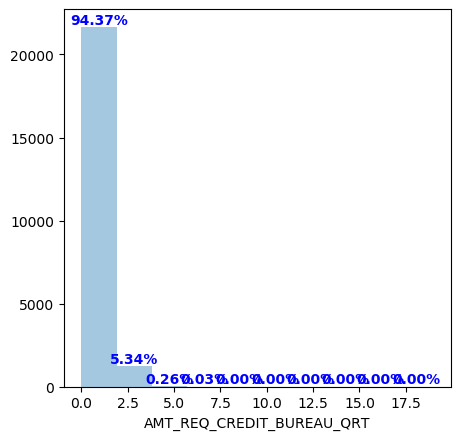

In [29]:
for a in amount_df:
    hist_numerical(a)

## For Target = 0

In [30]:
#Replacing NaN with 0
application_df_other['AMT_INCOME_TOTAL'] = application_df_other['AMT_INCOME_TOTAL'].replace(np.nan, 0)
application_df_other['AMT_CREDIT'] = application_df_other['AMT_CREDIT'].replace(np.nan, 0)
application_df_other['AMT_GOODS_PRICE'] = application_df_other['AMT_GOODS_PRICE'].replace(np.nan, 0)
application_df_other['AMT_ANNUITY'] = application_df_other['AMT_ANNUITY'].replace(np.nan, 0)
application_df_other['DEF_30_CNT_SOCIAL_CIRCLE'] = application_df_other['DEF_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
application_df_other['OBS_60_CNT_SOCIAL_CIRCLE'] = application_df_other['OBS_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
application_df_other['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_df_other['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan, 0)
application_df_other['AMT_REQ_CREDIT_BUREAU_MON'] = application_df_other['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan, 0)
application_df_other['AMT_REQ_CREDIT_BUREAU_QRT'] = application_df_other['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan, 0)
application_df_other.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CODE_GENDER                   4
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               2
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        1
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

## Plotting histogram for Numerical Columns for Target = 0

In [31]:
hist_num_0_cols = application_df_other[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [32]:
def hist_num_0(col_name,m=5,n=5):
    global application_df_other
    sorted(application_df_other[col_name])
    q1, q3= np.percentile(application_df_other[col_name],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    application_df_other = application_df_other[application_df_other[col_name] > lower_bound] 
    application_df_other = application_df_other[application_df_other[col_name] < upper_bound] 

    
    plt.figure(num=None,figsize=(m,n),dpi=100,facecolor='w',edgecolor='k')
    
    ax=sns.distplot(application_df_other[col_name],bins=10, kde=False)
    for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]

            ax.annotate('{:.2f}%'.format(100.*y/len(hist_num_0_cols)), (x.mean(), y), 
                ha='center', va='bottom',color='blue',weight='bold')

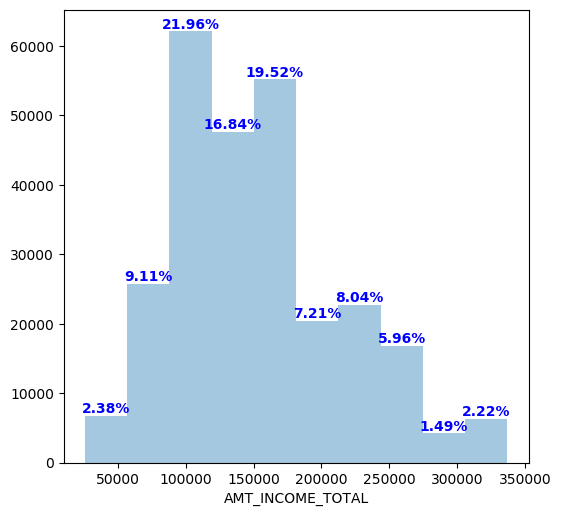

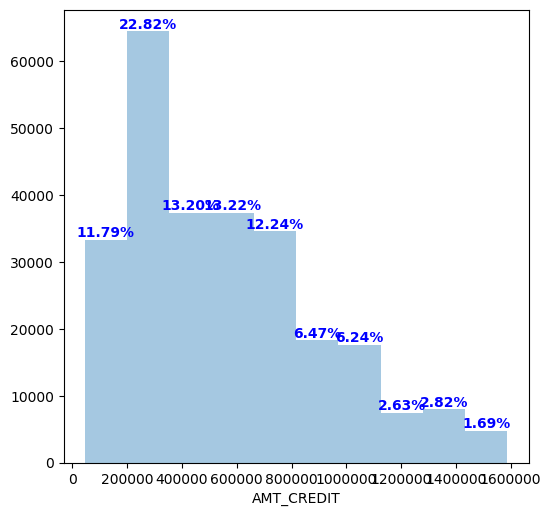

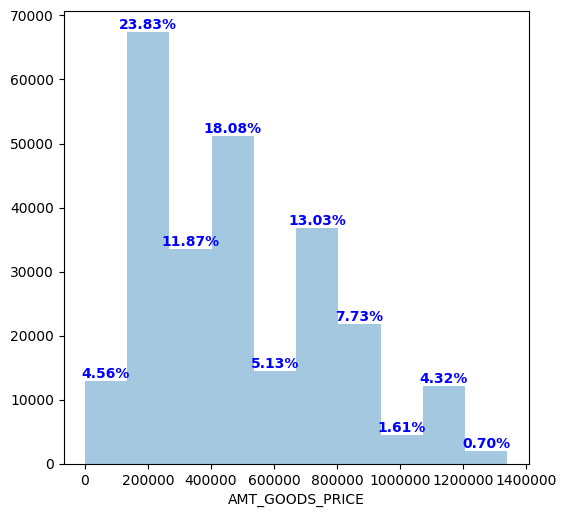

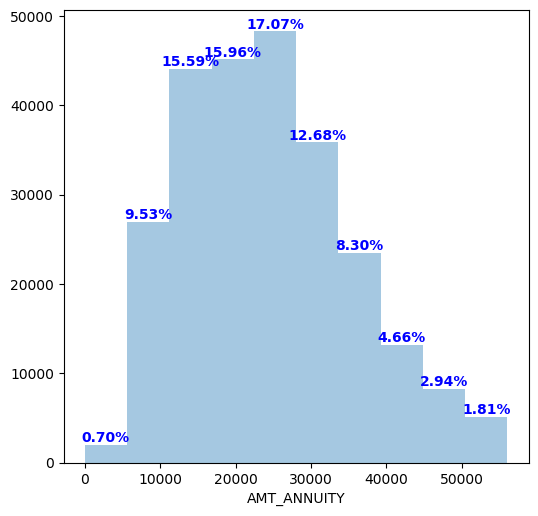

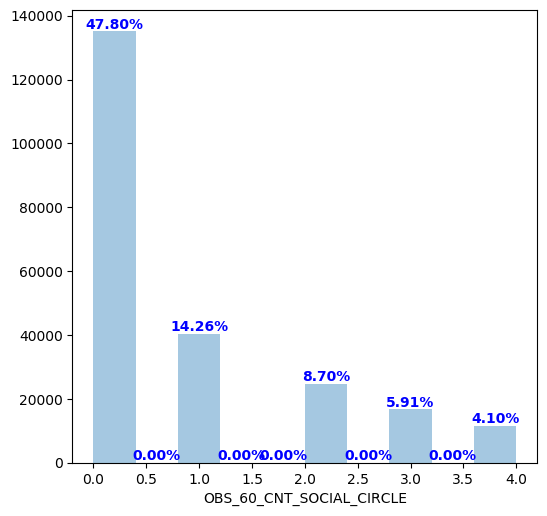

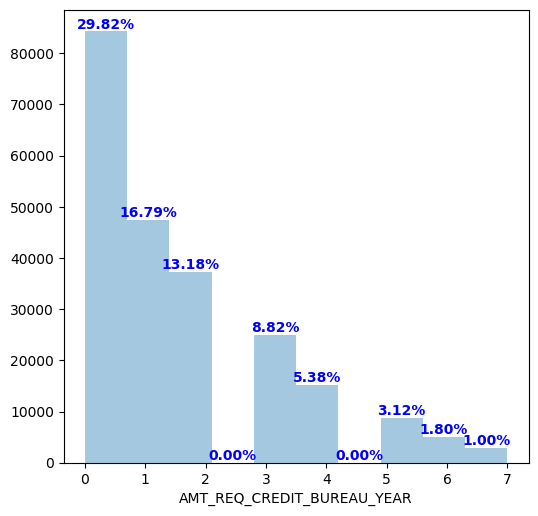

In [33]:
for b in hist_num_0_cols:
    hist_num_0(b)

## CORRELATION

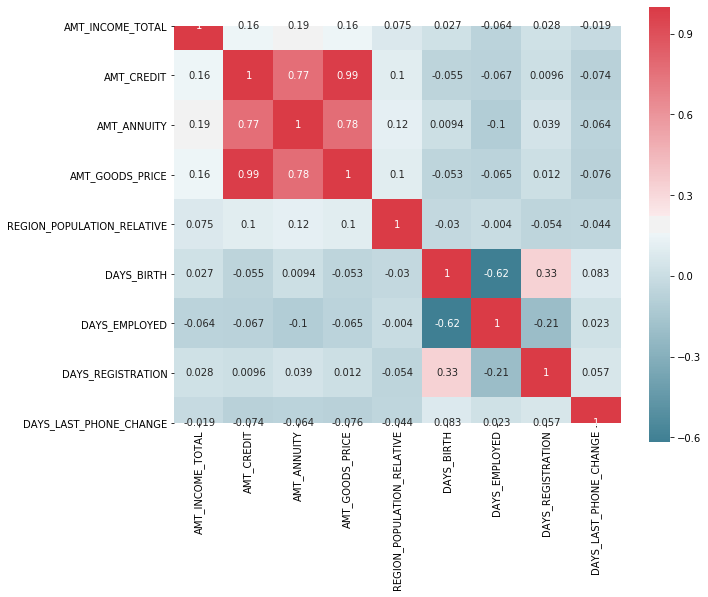

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
Final_columns_correlation = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                            'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                            'DAYS_REGISTRATION',
                            'DAYS_LAST_PHONE_CHANGE']

corelation = application_df[Final_columns_correlation].corr()

#corelation = numerical.corr()
sns.heatmap(corelation, mask=np.zeros_like(corelation, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax,annot=True)



Th following are  the inferences from the selected columns,

    1. Percentage of clients whose total income lies around 1,00,000 are facing more payment difficulties (~25.10%)
    2. Clients whose Credit amount of the loan is around 2,00,000 are more likely to face payment difficulties (~23.07%)
    3. Clients with Loan annuity with 15,000 to 35,000 are facing more payment difficulties.
    4. Customers whose price of the goods for which the loan is given ranging 2,00,000 and 5,00,000 are likely to get defaulted (~27.88% and ~25.35%)
    5. Percentage of clients whose total income ranging from 1,00,000 to 1,75,000 are likely to pay loan payment on time.
    6. Clients whose Credit amount of the loan is around 3,00,000 are more likely to pay loan payment on time.
    7. Customers whose price of the goods for which the loan is given around 2,00,000 are likely to pay loan payment on time.
    8. Customers whose age is ranging from 25 to 40 years are more likely to face more payment difficulties compared to other age groups.
    9. Clients with zero number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) are more likely to get defaulted.(~37.13%)
    10. Clients with zero observation of client's social surroundings with observable 60 DPD (days past due) are more likely to get defaulted (~59.18%)

## PREVIOUS DATA

In [35]:
previous_data = pd.read_csv(r"C:\Users\Divija\Downloads\previous_application.csv",na_values=['XNA','XNP'])
previous_data.isnull().mean()*100.00 
previous_data = previous_data.loc[:,previous_data.isnull().mean() < 0.50]
previous_data_approved = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Approved']
previous_data_canceled = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Canceled']
previous_data_refused = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Refused']
previous_data_unused = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Unused offer']


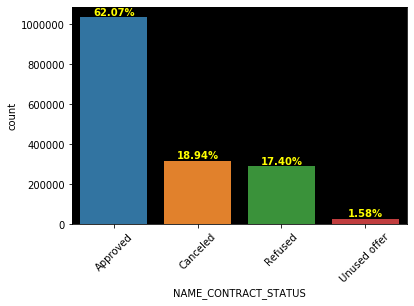

In [36]:
ax=sns.countplot(previous_data['NAME_CONTRACT_STATUS'], order = previous_data['NAME_CONTRACT_STATUS'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align

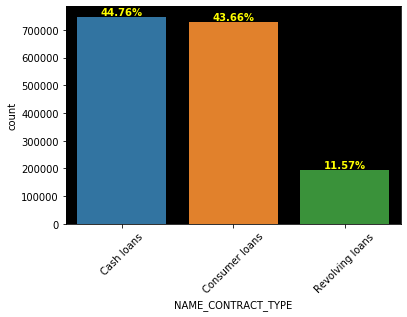

In [37]:
ax=sns.countplot(previous_data['NAME_CONTRACT_TYPE'], order = previous_data['NAME_CONTRACT_TYPE'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align

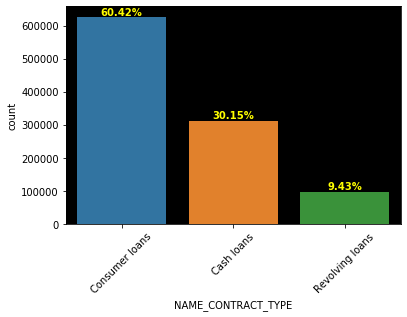

In [38]:
ax=sns.countplot(previous_data_approved['NAME_CONTRACT_TYPE'], order = previous_data_approved['NAME_CONTRACT_TYPE'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data_approved)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align

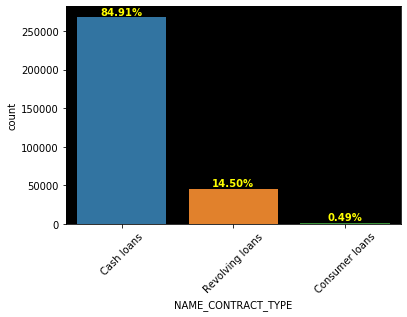

In [39]:
ax=sns.countplot(previous_data_canceled['NAME_CONTRACT_TYPE'], order = previous_data_canceled['NAME_CONTRACT_TYPE'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data_canceled)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align

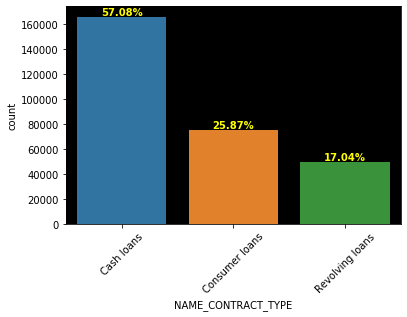

In [40]:
ax=sns.countplot(previous_data_refused['NAME_CONTRACT_TYPE'], order = previous_data_refused['NAME_CONTRACT_TYPE'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data_refused)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align


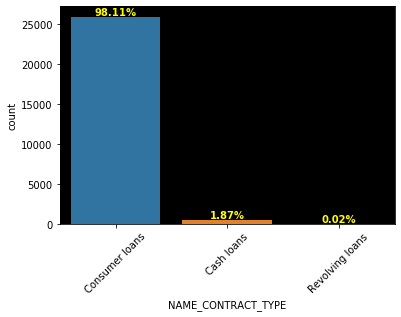

In [41]:
ax=sns.countplot(previous_data_unused['NAME_CONTRACT_TYPE'], order = previous_data_unused['NAME_CONTRACT_TYPE'].value_counts().index)
ax.set_facecolor("black")
plt.xticks(rotation=45)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.2f}%'.format(100.*y/len(previous_data_unused)), (x.mean(), y), 
            ha='center', va='bottom',color='yellow',weight='bold') # set the align
